In [5]:
# Riku Isola, Helsinki Metropolia University of Applied Sciences

# The object of this assingment is to  create and train a dense neural network to predict to classify the presence of heart disease

# In this case we are investingatin data. First we read the data to the frames, then getting summary of the data. 
# After that we are making diagram of the age distribution and checking missing values and get labels. 
# Finally we normalize data and run some tests and trainigs. 
# Last we check the test accuracy witch should be at least 99% but in this test it was only 64%.. 

# last edited: 9.2.2018

# After the updates this doesnt reagnize keras anymore!! Tried to update and restarting everything but still doesnt work..

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from keras import losses

ModuleNotFoundError: No module named 'keras'

In [9]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
filename4 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
colnames = ['age','sex','cp','tresbps','thal',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','chol','num']

# read data to data frame
df1 = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')


df2 = pd.read_csv(filename2, 
                 names = colnames, 
                 na_values = '?')

df3 = pd.read_csv(filename3, 
                 names = colnames, 
                 na_values = '?')

df4 = pd.read_csv(filename4, 
                 names = colnames, 
                 na_values = '?')
df1.head()

,age,sex,cp,tresbps,thal,fbs,restecg,thalach,exang,oldpeak,slope,ca,chol,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
frames = [df1,df2,df3,df4]

df = pd.concat(frames)
df.index = range(920)

df

,age,sex,cp,tresbps,thal,fbs,restecg,thalach,exang,oldpeak,slope,ca,chol,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [13]:
#yhteenveto luvuista
df.describe()

,age,sex,cp,tresbps,thal,fbs,restecg,thalach,exang,oldpeak,slope,ca,chol,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


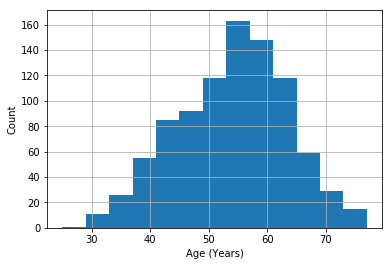

In [15]:
#ikäjakauma

df['age'].hist(bins = np.arange(25, 80, 4))
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

In [17]:
# missing values
df = df.where(~np.isnan(df), df.mode(), axis = 'columns')

label = df['num'] > 0
label

0      False
1       True
2       True
3      False
4      False
5      False
6       True
7      False
8       True
9       True
10     False
11     False
12      True
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20     False
21     False
22      True
23      True
24      True
25     False
26     False
27     False
28     False
29      True
       ...  
890     True
891     True
892     True
893     True
894     True
895     True
896     True
897     True
898     True
899     True
900     True
901     True
902     True
903     True
904     True
905     True
906    False
907     True
908     True
909     True
910     True
911     True
912     True
913     True
914     True
915     True
916     True
917    False
918     True
919     True
Name: num, Length: 920, dtype: bool

In [19]:
#labels
y = label.values
y

array([False,  True,  True, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,

In [21]:
# Data normalization

df = (df - df.min())/(df.max() - df.min())
df.head()

,age,sex,cp,tresbps,thal,fbs,restecg,thalach,exang,oldpeak,slope,ca,chol,num
0,0.714286,1.0,0.000000,0.725,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.75,0.00
1,0.795918,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.00,0.50
2,0.795918,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.00,0.25
3,0.183673,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.00,0.00
4,0.265306,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.00,0.00


In [23]:
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope']
data = df[columns].values

In [25]:
ndata = 920



ntrain= int(0.8*ndata) #80 testing, 10 training
train_data = data[:ntrain]
train_labels = label[:ntrain]
test_data = data[ntrain:]
test_labels = label[ntrain:]

In [28]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(15, activation = 'relu' , input_shape=(11, )))
network.add(layers.Dense(15, activation = 'relu'))
network.add(layers.Dense(1, activation = 'relu')) # output 0 ja 1 

ModuleNotFoundError: No module named 'keras'

In [31]:

from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(label, num_classes=None)

ModuleNotFoundError: No module named 'keras'

In [36]:
#network complication and prediction of accuracy

network.compile(optimizer ='rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

NameError: name 'network' is not defined

In [40]:
network.fit(train_data, train_labels, epochs = 50, batch_size = 100)

NameError: name 'network' is not defined

In [42]:
test_loss, test_acc = network.evaluate(test_data, test_labels)
print('test_accuracy', test_acc)

NameError: name 'network' is not defined

In [44]:
#with these settings I got 64,6% accuracy to the test. Test accuracy should be at least 99% so this isnt even close to that.